In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./train.csv')
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
235872,235872,176943,82407,Does the Indian education system benefit the p...,What are the major issues with Indian educatio...,0
196141,196141,296783,296784,Does McDonald's have a secret menu?,Is the McDonald's secret menu real?,1
57200,57200,60772,100548,Is it allowed for a dependent of UK Tier2 Gene...,What are the additional benefits/perks of havi...,0
356402,356402,54134,485713,How do I know I'm ready for the next relations...,When and how will I know that I am ready to en...,0
188804,188804,246852,190728,Why doesn't Quora allow Upvotes on Questions?,Quora: Why doesn't Quora have an upvote option...,1
120583,120583,15163,195562,Who are the strongest Marvel characters and why?,Who is the greatest Marvel character and why?,0
393402,393402,74733,258216,How do I become friends with a girl?,How can I become friends with many girls?,0
221371,221371,328706,328707,Have people gotten the Lollipop update for the...,Has anyone gotten the Lollipop update for the ...,1
158992,158992,176781,248269,I'm an Egyptian and I need to emigrate to Cana...,I am doing a master's in signal processing and...,0
96409,96409,11382,160595,Should President Obama pardon Hillary Clinton ...,If Hillary Clinton gets indicted and Trump bec...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df['is_duplicate'].value_counts())

0    255027
1    149263
Name: is_duplicate, dtype: int64


In [9]:
print(df['is_duplicate'].count())

404290


In [10]:
df['is_duplicate'].count()

404290

In [11]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())* 100)

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

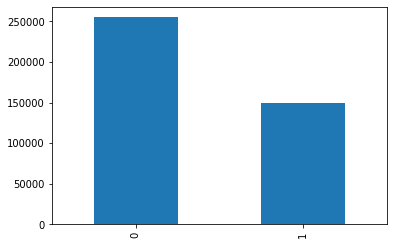

In [12]:
df['is_duplicate'].value_counts().plot(kind= 'bar')

In [21]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
print('\n')
x = qid.value_counts() > 1
print(x)
print('\n')
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933


2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
416446    False
416444    False
416441    False
416439    False
537933    False
Length: 537933, dtype: bool




Number of questions getting repeated 111780


In [14]:
qid.dtype

dtype('int64')

In [15]:
type(qid)

pandas.core.series.Series

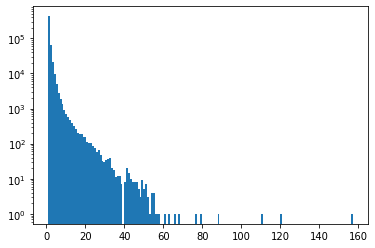

In [24]:
plt.hist(qid.value_counts(), bins=160)
plt.yscale('log')